Yanis sindt-baret, Quentin Ohayon, Mayoran Raveendran

Loading package / other files

In [2409]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import fonctionclassification as fc
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans,DBSCAN
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
import outliers


## Classification

Importing the dataset : 

In [2410]:
df1= pd.read_csv("normalized_clean_dataframe.csv", sep=",")
country_names=df1["Country Name"]
df=df1.drop(columns=["Country Name"],axis=1)
df


,Net migration,"Life expectancy at birth, total (years)",GDP per capita (current US$),Urban population (% of total population),Access to electricity (% of population)
0,-0.433596,-1.161755,-0.653437,-1.438328,0.534666
1,-0.073274,0.846086,-0.493077,-0.006763,0.618841
2,-0.188339,0.446663,-0.500057,0.552045,0.598095
3,0.392211,-1.422758,-0.600518,0.238739,-1.613389
4,-0.023765,0.755679,0.029261,-1.445785,0.623069
...,...,...,...,...,...
187,-0.026226,0.885452,0.895287,1.581583,0.623069
188,-0.127251,0.296241,-0.519617,0.730728,0.623069
189,-0.204055,-0.787870,-0.628983,-0.993699,-0.573840
190,0.054652,-1.333118,-0.620969,-0.691793,-1.858904


Now we import the database without outliers. 

In [2411]:
df1_wo_out= pd.read_csv("normalized_clean_dataframe_wo_outlier.csv", sep=",")
country_names=df1_wo_out["Country Name"]
df_wo_out=df1_wo_out.drop(columns=["Country Name"],axis=1)
df_wo_out


,Net migration,"Life expectancy at birth, total (years)",GDP per capita (current US$),Urban population (% of total population),Access to electricity (% of population)
0,-0.433596,-1.161755,-0.653437,-1.438328,0.534666
1,-0.073274,0.846086,-0.493077,-0.006763,0.618841
2,-0.188339,0.446663,-0.500057,0.552045,0.598095
3,0.392211,-1.422758,-0.600518,0.238739,-1.613389
4,-0.023765,0.755679,0.029261,-1.445785,0.623069
...,...,...,...,...,...
178,-0.026226,0.885452,0.895287,1.581583,0.623069
179,-0.127251,0.296241,-0.519617,0.730728,0.623069
180,-0.204055,-0.787870,-0.628983,-0.993699,-0.573840
181,0.054652,-1.333118,-0.620969,-0.691793,-1.858904


We choose the attribute Life expectancy at birth, total (years) to create 3 groups of countries : developed, underdeveloped, emerging

In [2412]:
name_col = "Life expectancy at birth, total (years)"
df_modif,X,Health,y=fc.classification(name_col,df)
df[name_col]
colonne=X.columns

And for the dataframe without outliers

In [2413]:
df_modif_wo_out,X_wo_out,Health_wo_out,y_wo_out=fc.classification(name_col,df_wo_out)
df_wo_out[name_col]
colonne_wo_out=X_wo_out.columns


The classification score is calculated by 3 methods for the dataset with outlier: F1, recall and accuracy

In [2414]:
F1,accuracy,classificationreport,dt=fc.score(name_col,X,Health)
print(classificationreport)

                precision    recall  f1-score   support

     developed       0.77      0.71      0.74        14
      emerging       0.57      0.57      0.57        14
underdeveloped       0.67      0.73      0.70        11

      accuracy                           0.67        39
     macro avg       0.67      0.67      0.67        39
  weighted avg       0.67      0.67      0.67        39



The same thing without outliers

In [2415]:
F1_wo_out,accuracy_wo_out,classificationreport_wo_out,dt_wo_out=fc.score(name_col,X_wo_out,Health_wo_out)
print(classificationreport_wo_out)

                precision    recall  f1-score   support

     developed       0.73      0.85      0.79        13
      emerging       0.50      0.46      0.48        13
underdeveloped       0.70      0.64      0.67        11

      accuracy                           0.65        37
     macro avg       0.64      0.65      0.64        37
  weighted avg       0.64      0.65      0.64        37



We have performed the 3 precision methods on a dataset with outliers and one without outliers. We notice after having calculated its precision that the data without outliers is not significaly different. That is why we are not going to use this dataframe but the one with outliers. Furthermore, the use of outliers could bring prediction errors to our classification. 

We test that by creating classes through clustering

In [2416]:
df2=df.copy()
kmeans = KMeans(n_clusters=4).fit(np.array(df2[name_col]).reshape(-1,1))
print(kmeans.labels_)
for i in range(0,len(kmeans.labels_)):
    if kmeans.labels_[i]==0:
        df2[name_col][i]="underdeveloped"
    elif kmeans.labels_[i]==1:
        df2[name_col][i]="future emerging"
    elif kmeans.labels_[i]==2:
        df2[name_col][i]="emerging"
    elif kmeans.labels_[i]==3:
        df2[name_col][i]="developed"


y2=df2[name_col]
health2=list(y2)

[0 1 3 2 1 3 3 3 1 1 3 3 1 3 3 3 1 3 2 1 3 0 3 0 3 3 3 2 2 3 0 2 1 2 2 1 3
 3 0 2 0 1 2 1 1 1 1 1 1 2 3 3 3 3 2 1 2 0 1 0 1 1 1 0 0 3 1 0 1 3 3 3 3 2
 2 0 0 3 1 3 1 0 0 3 0 1 1 1 3 1 3 3 2 0 1 1 3 0 3 1 2 2 1 3 1 1 0 2 3 1 2
 1 0 3 3 3 0 0 3 3 2 0 2 0 1 1 3 2 2 3 1 1 0 1 0 3 3 3 1 1 1 1 3 3 0 3 0 3
 0 3 3 2 1 3 1 0 2 0 1 3 3 3 0 3 1 1 0 0 0 1 0 2 3 3 3 3 0 0 2 3 1 1 1 1 3
 0 3 1 3 0 2 2]


C:\Users\supqu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The classification score is calculated by 3 methods: F1, recall and accuracy

In [2417]:
F1_2,accuracy_2,classificationreport_2,dt_2=fc.score(name_col,X,health2)
print(classificationreport_2)


                 precision    recall  f1-score   support

      developed       0.64      0.54      0.58        13
       emerging       0.60      0.50      0.55         6
future emerging       0.65      0.92      0.76        12
 underdeveloped       0.50      0.38      0.43         8

       accuracy                           0.62        39
      macro avg       0.60      0.58      0.58        39
   weighted avg       0.61      0.62      0.60        39



The results with the clustering are worse than the version created with the standard deviation and the mean. 
The class limit is : mean+0.5*std. With the version created with the standard deviation and the mean we have
a precision at the turn of 0.75 while with the clustering we are around 0.65.

### Decision tree

We will start by making a decision tree. To do this we will use the "train_test_split" function to separate the data into training and test sets, with a ratio of 80/20. The "plot_tree" function is then used to display the trained decision tree with the appropriate column names and class names.

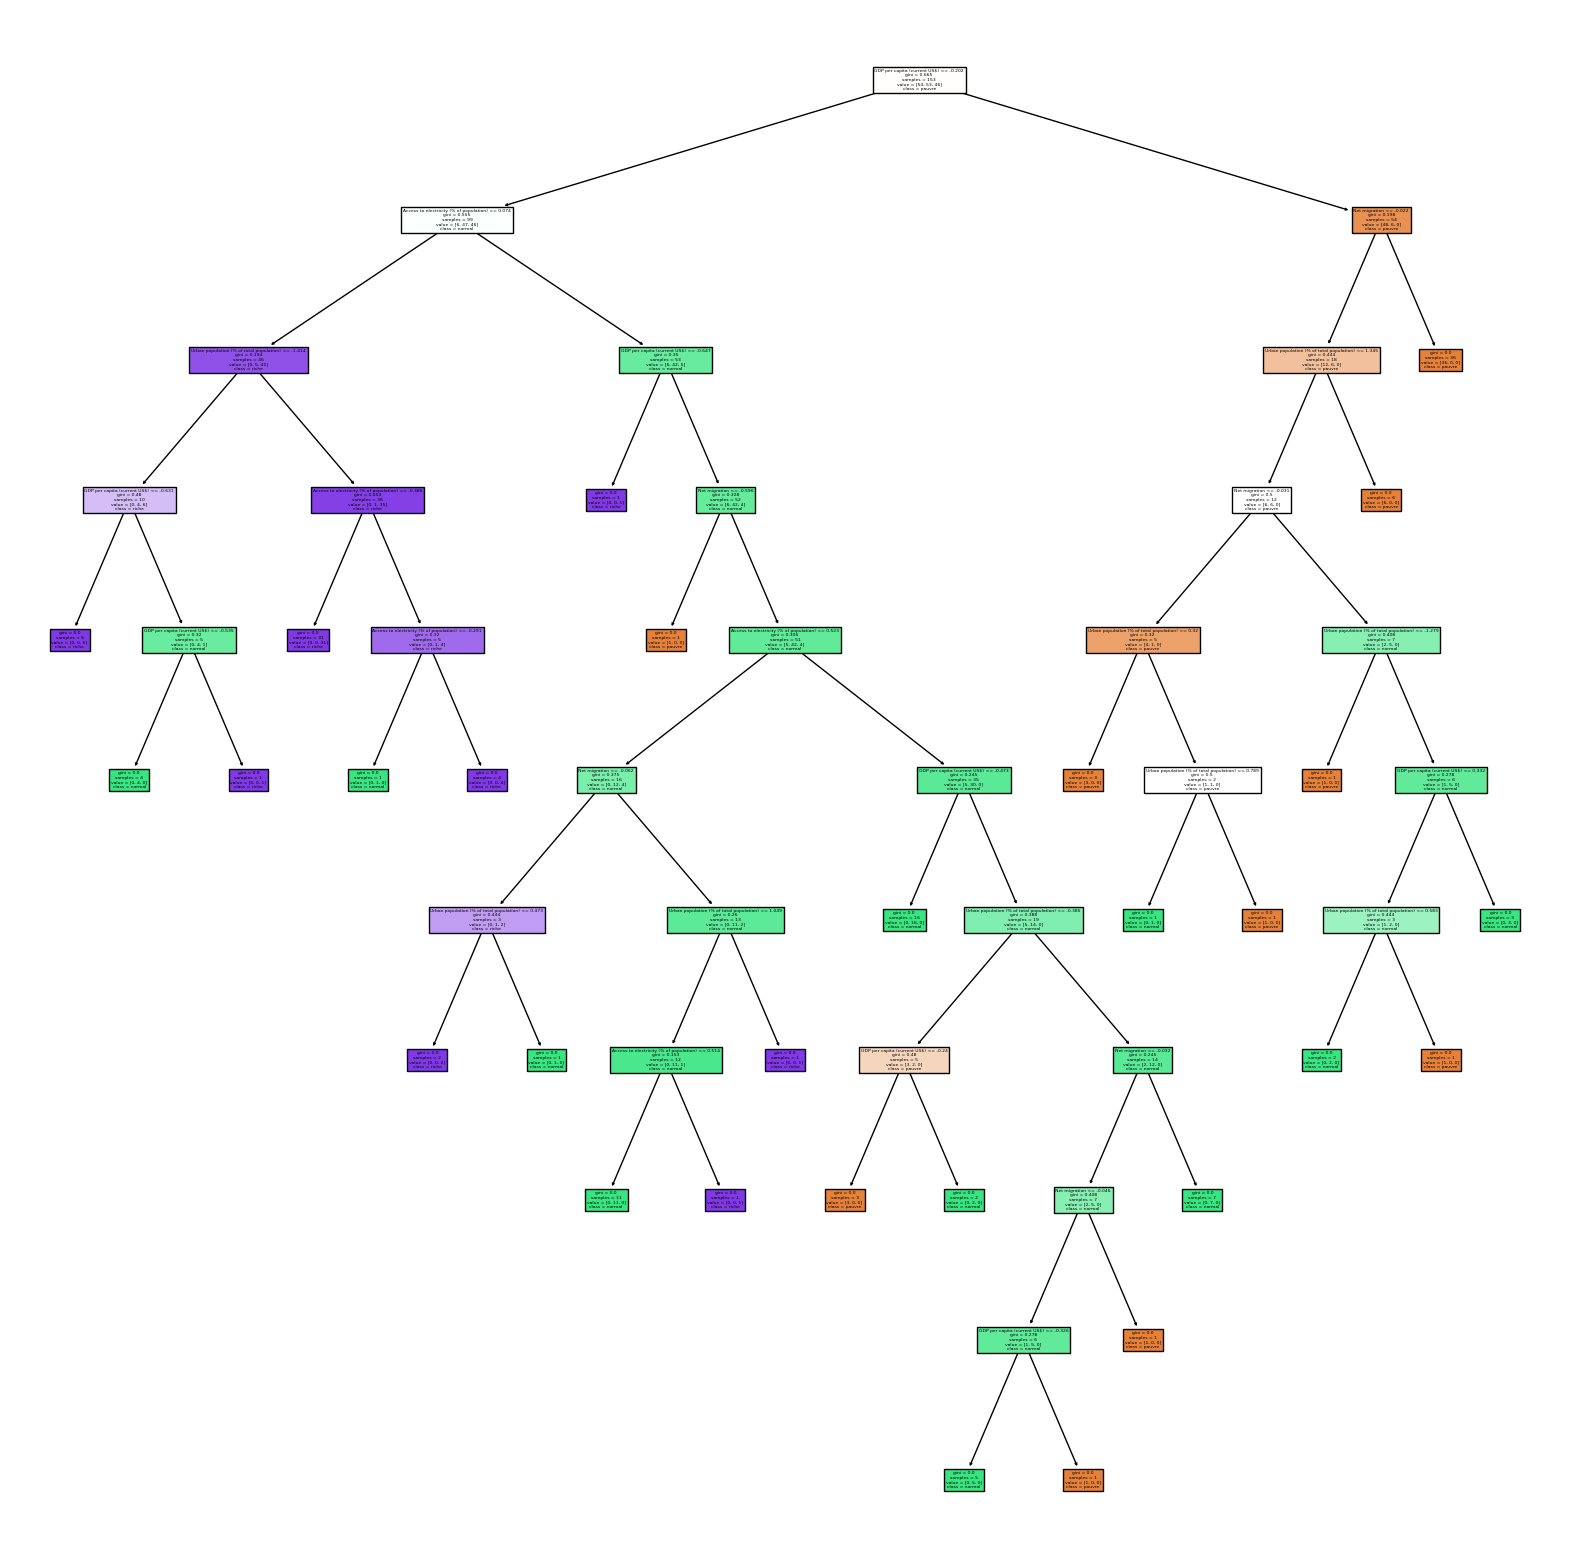

In [2418]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Health, test_size=0.20, \
train_size=0.80,shuffle=True,stratify=Health)
fc.train_dt(x_train,y_train)
_=plot_tree(dt,filled=True,feature_names=colonne,class_names=["pauvre","normal","riche"])

Sklearn's decision tree algorithm allows us to deduce the relationships between different features in a data set and the target variable by building a tree model. The decision tree is used here for classification tasks. The decision process of the model can be visualised, which makes it easier to understand and interpret the results.

+ Training the $K$-NN model with default parameters, using the raw data set and another using the normalised data set

In [2419]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_validate 

cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, X, y, scoring=scoring,cv=cv, return_train_score=True)
scores = pd.DataFrame(scores).mean()
scores


fit_time                    0.003053
score_time                  0.012340
test_accuracy               0.750000
train_accuracy              0.817708
test_precision_weighted     0.771760
train_precision_weighted    0.829495
test_recall_weighted        0.750000
train_recall_weighted       0.817708
test_f1_weighted            0.753525
train_f1_weighted           0.819622
dtype: float64

In [2420]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize the KNN model with n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)

# train the model with the data
knn.fit(X,y)

# train the model with the data
clusters_knn = knn.predict(X)

cluster1_d=[]
cluster2_d=[]
cluster3_d=[]
clusterErr_d=[]
i=0
for lin in country_names:
    if clusters_knn[i]=="underdeveloped":
        cluster1_d.append(lin)
    elif clusters_knn[i]=="emerging":
        cluster2_d.append(lin)
    elif clusters_knn[i]=="developed":
        cluster3_d.append(lin)
    else:
        clusterErr_d.append(lin)
    i+=1

print("======================================================")
print("Poor country : ")   
print("======================================================")
print(cluster1_d)
print("======================================================")
print("Average country : ")   
print("======================================================")
print(cluster2_d)
print("======================================================")
print("Rich countries : ")   
print("======================================================")
print(cluster3_d)
print("======================================================")
print("Unclassified countries : ")
print("======================================================")
print(clusterErr_d)

Poor country : 
['Angola', 'Bangladesh', 'Benin', 'Brazil', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada', 'Chad', 'Chile', 'Congo, Rep.', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Estonia', 'Faroe Islands', 'Georgia', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Kiribati', 'Liberia', 'Lithuania', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Panama', 'Papua New Guinea', 'Poland', 'Puerto Rico', 'Seychelles', 'Singapore', 'Slovenia', 'Spain', 'Suriname', 'Timor-Leste', 'Turkmenistan', 'Uganda', 'Ukraine', 'Virgin Islands (U.S.)']
Average country : 
['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda', 'Armenia', 'Azerbaijan', 'Belarus', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei Darussalam', 'Burkina Faso', 'Cambodia', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Finland', 'Gambia, The', 'Germany', 'Greece', 'Guam',

<AxesSubplot: >

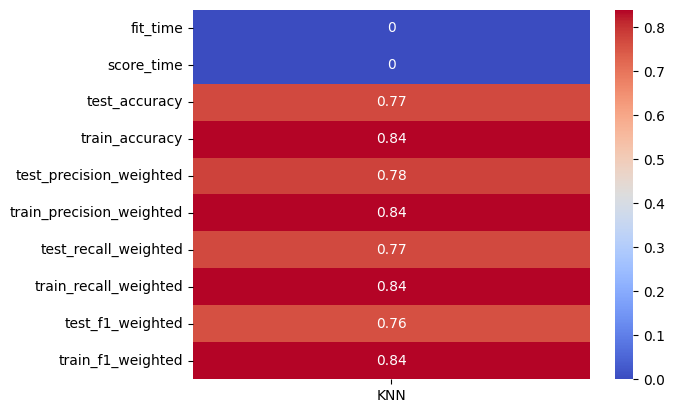

In [2421]:
import seaborn as sns
full_scores = pd.DataFrame({"KNN":scores_knn})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

This is a set of model performance results. The columns "fit_time" and "score_time" indicate respectively the time needed to train the model and to evaluate it. Here the calculation time is very low, so it is very quick to calculate. The columns "test_accuracy" and "train_accuracy" indicate respectively the accuracy of the model on the test data and on the training data. Here the values are around 0.8, with train_accuracy being higher than test_accuracy.  This is because the algorithm has been adjusted to the training data, so it is better suited to this data. This may indicate a degree of overlearning, i.e. the algorithm has learned the noise in the training data rather than the general trends.

# Cross-validation

In [2422]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

+ Create a __stratified cross-validation__ splitter 

In [2423]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

+ Define a __list of evaluation metrics__ to assess

In [2424]:
#Evaluates the performance of a decision model (dt) on training (X) and test (y) data.
#The cross_validate function performs cross-validation by dividing the data into multiple folds 
#and training and testing the model on each. 
scores=[]

scores = cross_validate(dt, X, y, scoring=scoring,
                        cv=cv, return_train_score=True)
a=sklearn.model_selection.cross_validate(dt, X, y)
print(a["score_time"][3])
print(a)


0.0040035247802734375
{'fit_time': array([0.00524402, 0.00400043, 0.00399995, 0.00368905, 0.00398588]), 'score_time': array([0.00400162, 0.00400233, 0.00432801, 0.00400352, 0.        ]), 'test_score': array([0.71794872, 0.64102564, 0.78947368, 0.65789474, 0.78947368])}


+ the fit_time: is an array of the time needed to train the model on each "fold" of the cross-validation
+ score_time: is a table containing the time needed to evaluate the model on each "fold" of the cross-validation
+ the test_score: is a table containing the accuracy scores on the test data for each "fold" of the cross-validation

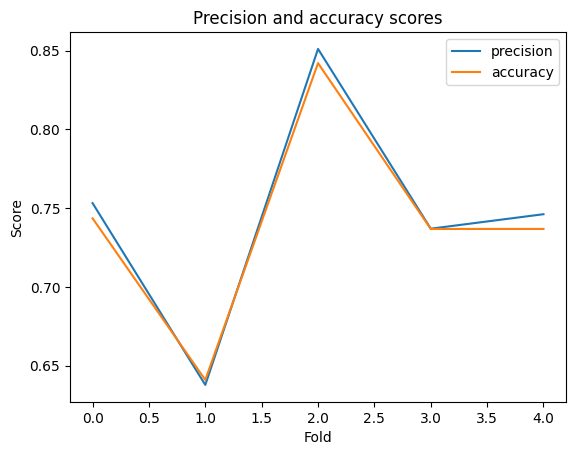

In [2425]:
cv=sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
scores=sklearn.model_selection.cross_validate(dt,X,y,scoring=["precision_weighted","accuracy"]\
,cv=cv,return_train_score=True)
pd.DataFrame(scores).mean()
plt.plot(scores["test_precision_weighted"],label="precision")
plt.plot(scores["test_accuracy"],label="accuracy")  
plt.xlabel("Fold")
plt.ylabel("Score")
plt.title("Precision and accuracy scores")
plt.legend()
plt.show()

Precision and accuracy are almost identical, which means that the model has a similar performance in predicting correct values and avoiding false positives.

## Overfitting

In [2426]:
# Test several maximum numbers of leaves
cv = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
results = {}
for leaves in range(2,19):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="entropy")
    
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pd.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df2 = pd.DataFrame(results)


Text(0.5, 0, 'Max Nb. Leaves (more complexe models on the right)')

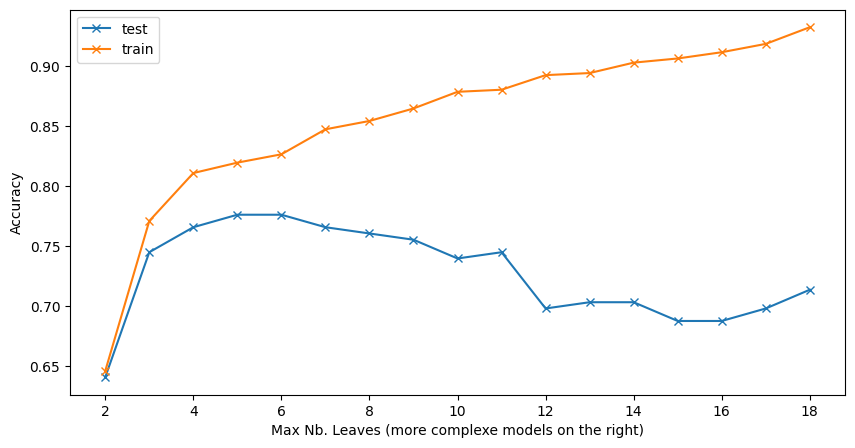

In [2427]:
plt.figure(figsize=(10, 5))
plt.plot(results_df2.T.index,
         results_df2.T["test_accuracy"],"x-", label="test")
plt.plot(results_df2.T.index,
         results_df2.T["train_accuracy"],"x-", label="train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Max Nb. Leaves (more complexe models on the right)")

The graph shows us that the train always continues to improve in prediction as the test increases and then after 10 leaves it starts to decrease. This is probably due to the overtraining of the model. The model is so well adapted to this data that it can no longer generalise effectively to new data. 